In [2]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

from platform import python_version
print(f'python version: {python_version()}')

Conda Environment: rich_clust
python version: 3.9.12


In [3]:
import os
from pathlib import Path
# import scipy.io
import scipy.sparse
import matplotlib.pyplot as plt
import numpy as np
import sklearn.manifold
import sklearn.cluster
import seaborn as sns
import pandas as pd
import sparse
import cv2
import natsort

import torch
# from kymatio.torch import Scattering2D

import gc
from tqdm.notebook import tqdm
import copy
import time
import random
import functools
import multiprocessing as mp


In [6]:
dir_github = Path(r'/media/rich/Home_Linux_partition/github_repos/').resolve()

import sys
sys.path.append(str(dir_github))

%load_ext autoreload
%autoreload 2
from ROICaT.tracking import visualization, helpers


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
results = helpers.simple_load(r'/home/rich/Downloads/rbp10.plane0.rClust.pkl')

In [8]:
FOVs_colored = visualization.compute_colored_FOV(
    spatialFootprints=results['ROIs']['ROIs_aligned'], 
    FOV_height=results['ROIs']['frame_height'], 
    FOV_width=results['ROIs']['frame_width'], 
    preds=results['UCIDs'], 
)

<IPython.core.display.Javascript object>


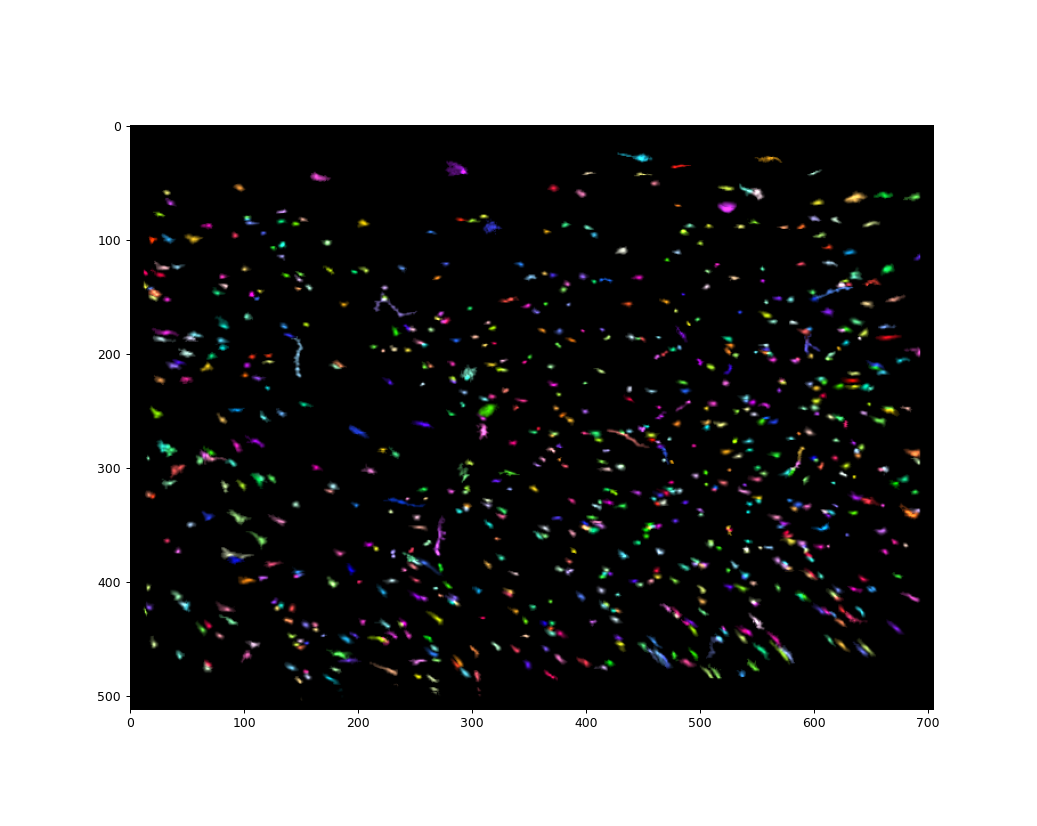

interactive(children=(IntSlider(value=0, description='i_frame', max=13), Output()), _dom_classes=('widget-inte…

In [9]:
%matplotlib notebook

visualization.display_toggle_image_stack(FOVs_colored)

In [130]:
from basic_neural_processing_modules import pickle_helpers

In [154]:
test = pickle_helpers.simple_load('/media/rich/bigSSD/analysis_data/ROI_tracking/gyu_test_comparisons/test_20220825/our_sf.pickle')

In [161]:
ucids = np.concatenate(test['matchings'])

In [163]:
FOVs_colored = visualization.compute_colored_FOV(
    spatialFootprints=[val.T for val in test['A']], 
    FOV_height=test['dims'][0], 
    FOV_width=test['dims'][1], 
    preds=ucids, 
)

<IPython.core.display.Javascript object>


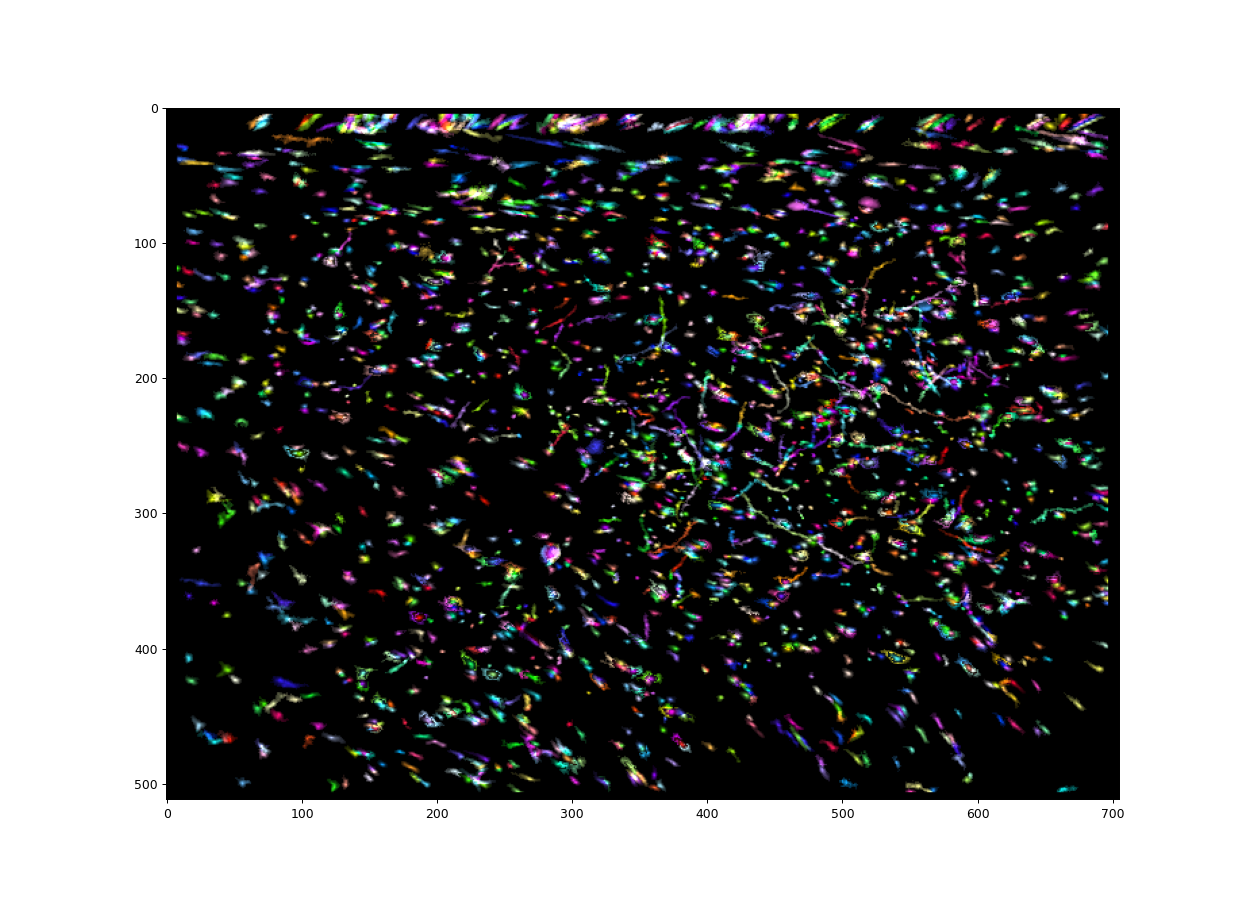

interactive(children=(IntSlider(value=0, description='i_frame', max=1), Output()), _dom_classes=('widget-inter…

In [164]:
%matplotlib notebook

visualization.display_toggle_image_stack(FOVs_colored)